Krakenex is a Python wrapper to send queries to Kraken. 

# Import Packages

In [1]:
import krakenex
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc
from matplotlib import style
style.use('ggplot')

In [42]:
%matplotlib inline 

# Test kraken rest API

## simple public query

In [5]:
k = krakenex.API()

In [6]:
k.query_public('Ticker?pair=XXBTZEUR')

{'error': [],
 'result': {'XXBTZEUR': {'a': ['6414.00000', '1', '1.000'],
   'b': ['6413.90000', '7', '7.000'],
   'c': ['6413.90000', '0.03530200'],
   'v': ['2220.33922003', '2838.19450300'],
   'p': ['6469.03972', '6489.42535'],
   't': [10586, 13492],
   'l': ['6281.80000', '6281.80000'],
   'h': ['6670.00000', '6670.00000'],
   'o': '6659.80000'}}}

## Other public queries

In [50]:
start = k.query_public('Time')
start

{'error': [],
 'result': {'unixtime': 1574625368,
  'rfc1123': 'Sun, 24 Nov 19 19:56:08 +0000'}}

In [52]:
query = k.query_public('Trades', {'pair':'XXBTZEUR'})
last_trades = query['result']['XXBTZEUR']
last_trades

[['6437.30000', '0.15489847', 1574618962.0692, 'b', 'l', ''],
 ['6437.30000', '0.18403660', 1574618963.3586, 'b', 'l', ''],
 ['6436.80000', '0.06134860', 1574618965.9449, 'b', 'l', ''],
 ['6436.70000', '0.06134860', 1574618968.5193, 'b', 'l', ''],
 ['6436.70000', '0.06134553', 1574618969.7946, 'b', 'l', ''],
 ['6436.70000', '0.06135781', 1574618971.0913, 'b', 'l', ''],
 ['6436.70000', '0.02044953', 1574618973.6367, 'b', 'l', ''],
 ['6436.70000', '0.02044851', 1574618974.9328, 'b', 'l', ''],
 ['6436.70000', '0.18404580', 1574618985.9371, 'b', 'l', ''],
 ['6436.70000', '0.18406421', 1574618987.2331, 'b', 'l', ''],
 ['6436.60000', '0.00400000', 1574618987.2423, 's', 'm', ''],
 ['6436.70000', '0.01456906', 1574618988.5387, 'b', 'l', ''],
 ['6436.70000', '0.16947674', 1574618988.5412, 'b', 'l', ''],
 ['6436.60000', '0.00350000', 1574618994.967, 's', 'm', ''],
 ['6436.60000', '0.01978429', 1574619002.092, 's', 'm', ''],
 ['6434.50000', '0.39021571', 1574619002.0947, 's', 'm', ''],
 ['6434.60

Order book

In [53]:
query = k.query_public('Depth', {'pair':'XXBTZEUR'})
depth = query['result']['XXBTZEUR']
depth

{'asks': [['6383.80000', '11.719', 1574625753],
  ['6384.20000', '2.000', 1574625753],
  ['6384.50000', '2.888', 1574625752],
  ['6385.80000', '2.530', 1574625743],
  ['6385.90000', '0.142', 1574625743],
  ['6386.40000', '0.040', 1574625748],
  ['6387.60000', '2.697', 1574625738],
  ['6390.70000', '0.217', 1574625755],
  ['6392.20000', '0.795', 1574625755],
  ['6392.40000', '0.050', 1574625754],
  ['6393.60000', '0.060', 1574625753],
  ['6393.70000', '0.222', 1574625743],
  ['6394.80000', '0.195', 1574625729],
  ['6396.10000', '0.060', 1574625743],
  ['6397.20000', '0.060', 1574625737],
  ['6397.80000', '0.060', 1574625736],
  ['6398.00000', '1.979', 1574625740],
  ['6398.10000', '1.000', 1574625737],
  ['6398.20000', '5.845', 1574625733],
  ['6400.90000', '0.022', 1574625728],
  ['6403.80000', '0.379', 1574625756],
  ['6403.90000', '5.840', 1574625739],
  ['6405.00000', '2.000', 1574625449],
  ['6405.50000', '0.203', 1574625190],
  ['6406.10000', '0.159', 1574625754],
  ['6406.20000',

## Private queries

kraken API provides private information like positions, balance, etc. It is also possible to submit orders via the API.

In [ ]:
# need to add public and private key
# k = krakenex.API(key=MY_PUBLIC_KEY, secret=MY_PRIVATE_KEY)



# Visualizing

## Data import

In [7]:
ohlc = k.query_public('OHLC', {'pair': 'XTZEUR', 'interval': 60})['result']['XTZEUR']

Pandas and matplotlib

In [33]:
columns = ['time', 'open', 'high', 'low', 'close', 'vwap', 'volume', 'count']
columns

['time', 'open', 'high', 'low', 'close', 'vwap', 'volume', 'count']

In [34]:
df = pd.DataFrame(ohlc, columns = columns)
df.head()

,time,open,high,low,close,vwap,volume,count
0,1572033600,0.7460,0.7498,0.7343,0.7444,0.7390,5965.39607748,53
1,1572037200,0.7435,0.7445,0.7357,0.7445,0.7431,4901.36283740,26
2,1572040800,0.7445,0.7549,0.7445,0.7510,0.7504,4359.00235695,48
3,1572044400,0.7510,0.7553,0.7496,0.7508,0.7547,298.05934899,9
4,1572048000,0.7508,0.7892,0.7331,0.7775,0.7705,37178.56148320,217


In [35]:
df = df.astype(float)
df.head()

,time,open,high,low,close,vwap,volume,count
0,1.572034e+09,0.7460,0.7498,0.7343,0.7444,0.7390,5965.396077,53.0
1,1.572037e+09,0.7435,0.7445,0.7357,0.7445,0.7431,4901.362837,26.0
2,1.572041e+09,0.7445,0.7549,0.7445,0.7510,0.7504,4359.002357,48.0
3,1.572044e+09,0.7510,0.7553,0.7496,0.7508,0.7547,298.059349,9.0
4,1.572048e+09,0.7508,0.7892,0.7331,0.7775,0.7705,37178.561483,217.0


In [36]:
df['time'] = pd.to_datetime(df['time'], unit = 's', utc = True)

In [37]:
?pd.DatetimeIndex.tz_convert

In [38]:
df['time'] = df['time'].dt.tz_convert('Europe/Paris')

In [39]:
# localise l'heure:
df['time'] = df['time'].dt.tz_localize(None)
df.head()

,time,open,high,low,close,vwap,volume,count
0,2019-10-25 22:00:00,0.7460,0.7498,0.7343,0.7444,0.7390,5965.396077,53.0
1,2019-10-25 23:00:00,0.7435,0.7445,0.7357,0.7445,0.7431,4901.362837,26.0
2,2019-10-26 00:00:00,0.7445,0.7549,0.7445,0.7510,0.7504,4359.002357,48.0
3,2019-10-26 01:00:00,0.7510,0.7553,0.7496,0.7508,0.7547,298.059349,9.0
4,2019-10-26 02:00:00,0.7508,0.7892,0.7331,0.7775,0.7705,37178.561483,217.0


In [40]:
df = df.tail(100)
df.loc[:,'time'] = df.loc[:,'time'].map(mdates.date2num) 

In [41]:
df.head()

,time,open,high,low,close,vwap,volume,count
620,737383.708333,1.0951,1.1143,1.0909,1.1143,1.1036,19421.506115,79.0
621,737383.750000,1.1143,1.1200,1.1007,1.1153,1.1134,9263.848355,73.0
622,737383.791667,1.1110,1.1155,1.1050,1.1147,1.1116,2990.992101,34.0
623,737383.833333,1.1147,1.1179,1.0925,1.0938,1.0952,50942.124889,30.0
624,737383.875000,1.0938,1.0938,1.0708,1.0850,1.0840,35227.845469,85.0


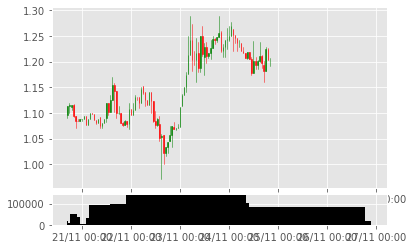

In [48]:
#fig = plt.figure()
plt.figure()
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax1)
candlestick_ohlc(ax1, df.values, width = 0.01, colorup = 'green', colordown = 'red') # modifier le width selon l’intervalle
ax2.bar(df['time'],df['volume'],0.015, color='k') # idem
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d/%m %H:%M')) 
plt.show()

In [1]:
df.head()

NameError: name 'df' is not defined